# Logic Analyzer

In the previous tutorial we saw that the oscilloscope is not the ideal instrument for looking at digital signals. The PSLab has another instrument more suited for this purpose: The logic analyzer.

The PSLab's oscilloscope struggles with digital signals with frequencies over 50 kHz. Let's see how the logic analyzer does. This time, connect SQ1 to LA1.

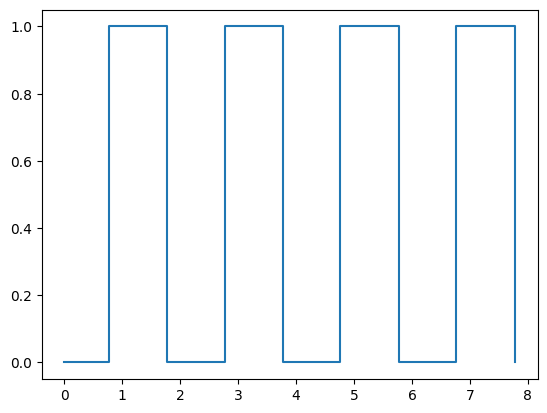

In [9]:
import matplotlib.pyplot as plt
import pslab
psl = pslab.ScienceLab()
psl.pwm_generator.generate(channels="SQ1", frequency=500_000, duty_cycles=0.5)
t = psl.logic_analyzer.capture(channels="LA1", events=8)
x, y = psl.logic_analyzer.get_xy(t)
plt.plot(x, y)

Much better!

The logic analyzer also has four channels, so we can use it to look at all the PWM outputs simultaneously. Connect SQ2 to LA2, SQ3 to LA3, and SQ4 to LA4.

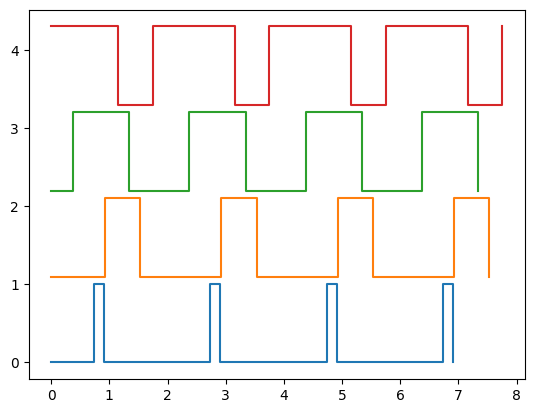

In [17]:
psl.pwm_generator.generate(channels=4, frequency=500_000, duty_cycles=[0.1, 0.3, 0.5, 0.7], phases=[0, 0.2, 0.5, 0.8])
t = psl.logic_analyzer.capture(channels=4, events=8)
x1, y1, x2, y2, x3, y3, x4, y4 = psl.logic_analyzer.get_xy(t)
plt.plot(x1, y1, x2, y2 + 1.1, x3, y3 + 2.2, x4, y4 + 3.3)

Here we have offset the graphs from each other on the y-axis to make them easier to tell apart.

Note that the output from the logic analyzer's `capture` method is a list of timestamps for "events", i.e. logic level transissions, for each channel. In order to get something which is more suitable for plotting, the logic analyzer provides a `get_xy` method, which converts the timestamps into x and y values similar to the oscilloscope's output. Each channel has its own x and y pair.

That's the basics of the PSLab's six core instruments!

The PSLab also provides three types of serial buses: I2C, SPI, and UART. The buses can be used to connect external sensors and devices.